# compact_PIV tutorial

This tutorial gives examples of constructing `compact_PIV` instances and retrieve PIV data using it. 

## The idea: More compact PIV data storage

Currently, PIV data are stored in separate text files. A text file corresponds to a pair of frames. This leads to large file number when we have long videos. However, not all the information in the files are useful. For example, the x, y information are repetitive in all the N text files. Instead of keeping N copies, we can just keep 1 to save storage space. Moreover, the mask information is also repetitive. Therefore, we can seek more compact format to store PIV data. 

The compact data structure makes it less straightforward to access PIV data, due to the fact that x, y and u, v are not in the same shape, and we have to specify the index carefully to avoid making mistakes. I think it makes sense to write a class of `compact_PIV`, which defines the conversion between traditional PIV data structure and compact PIV data structure, and make retrieving data easier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import savemat, loadmat
from myImageLib import readdata
import os
from pivLib import apply_mask, to_matrix, compact_PIV
from skimage import io

## 1. Construct `compact_PIV` 

- from conventional PIV data filelist

In [2]:
l = readdata("scratch", "csv")
cpiv = compact_PIV(l)

- from a saved .mat file

In [3]:
cpiv_dict = loadmat("scratch/cpiv.mat")
cpiv = compact_PIV(cpiv_dict)

## 2. Retrieve data from `compact_PIV` instance

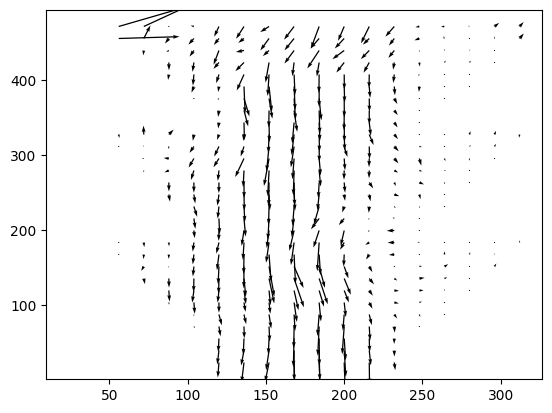

In [4]:
x, y, u, v = cpiv.get_frame(0, by="index")
plt.quiver(x, y, u, v)

In [5]:
cpiv.get_labels()

['00001',
 '00002',
 '00003',
 '00004',
 '00005',
 '00006',
 '00007',
 '00008',
 '00009',
 '00010']

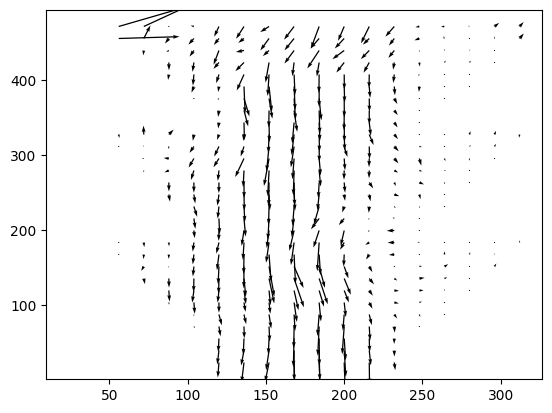

In [6]:
x, y, u, v = cpiv.get_frame("00001", by="filename")
plt.quiver(x, y, u, v)

## 3. Save data to .mat file

We can use the Matlab .mat file to save the PIV data. It has two advantages:

- it has no dimension restriction, so we can save x, y, mask data only once
- save one file for an image sequence, instead of one file per image, making the data more portable and maintainable
- easier to interface with Matlab users

In [7]:
cpiv.to_mat("scratch/cpiv.mat")